In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axisartist.axislines import Subplot 
import plotly.graph_objects as go

import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
import cufflinks as cf
from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib import rcParams

warnings.filterwarnings('ignore')
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

# preproccesing 

uploading the data 

In [432]:
df = pd.read_csv('../data/aqar.csv')

In [433]:
try:
    df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] ,axis=1 , inplace=True)
except:
    i=1

In [434]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'DayOfRent', 'timeBeforeRent', 'onMarket'],
      dtype='object')

more info about each column in the README file

there are 6762 apartment (this is when i webScraped the data in 6/8/2022)

In [435]:
df.shape

(6762, 31)

this is how many left now  4434

In [436]:
df[df['DayOfRent'] == 0].shape

(4434, 31)

this is how many of the apartment are not there when i last check (rented ) 2328

In [437]:
df[df['DayOfRent'] != 0].shape

(2328, 31)

i will add new column to check if it is rented or not i will 

In [438]:
df['isOffMarket'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

In [439]:
df['isOffMarket'].value_counts()

False    4434
True     2328
Name: isOffMarket, dtype: int64

also i will create two dataframe one will contain the value of rened apartment and the second will contain the values of unrented apartment 

In [440]:
offMarket = df.loc[(df['DayOfRent'] != 0) ]
onMarket = df.loc[(df['DayOfRent'] == 0) ]

# EDA

##  how many apartment are rent it daily 

In [441]:
offMarket.DayOfRent.value_counts()

2     394
4     350
1     282
5     261
8     245
10    212
3     184
9     168
6     117
7     115
Name: DayOfRent, dtype: int64

In [442]:
offMarket.DayOfRent.value_counts().mean()

232.8

In [443]:
df.groupby('DayOfRent' , ).size()

DayOfRent
0     4434
1      282
2      394
3      184
4      350
5      261
6      117
7      115
8      245
9      168
10     212
dtype: int64

In [444]:
temp = pd.DataFrame(columns= ['day' , 'rented' , 'notRented'])
temp['day'] ='0'
temp

,day,rented,notRented


In [447]:



temp = temp.append({'day': '1' ,'rented': df[df['DayOfRent'] == 1 ].shape[0], 'notRented': df[df['DayOfRent'] != 1 ].shape[0] } , ignore_index=True)
temp = temp.append({'day': '2' ,'rented': df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2)].shape[0] , 'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2)].shape[0] } , ignore_index=True)
temp = temp.append({'day': '3' ,'rented': df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) ].shape[0] , 'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) ].shape[0] } , ignore_index=True)
temp = temp.append({'day': '4' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)].shape[0] , 
         
         
         'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '5' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)].shape[0] , 
         
         
         'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '6' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '7' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '8' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '9' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)|
         (df['DayOfRent'] == 9)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)&
         (df['DayOfRent'] != 9)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '10' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)|
         (df['DayOfRent'] == 9)|
         (df['DayOfRent'] == 10)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)&
         (df['DayOfRent'] != 9)&
         (df['DayOfRent'] != 10)].shape[0]} , ignore_index=True)

## how fast the apartment got rentet?

In [449]:
fig = go.Figure( layout=go.Layout(
        title=go.layout.Title(text="we can see how is rented apartment is increasing daily ")
    ))
fig.add_trace(go.Scatter(x=temp["day"], y=temp["rented"], name="rented", mode="lines"))
fig.add_trace(go.Scatter(x=temp["day"], y=temp["notRented"], name="notRented", mode="lines"))
# fig.upday_layout(
#     title="ICICI BANK stock prices", xaxis_title="day", yaxis_title="Close"
# )
fig.show()


## is there a price diffrent on rented and unrented apartemnt

In [451]:

fig = px.box(df, 'price' ,'isOffMarket' )
fig.show()

In [452]:
offMarket.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,timeBeforeRent,onMarket
count,2.328000e+03,2.328000e+03,2328.000000,2328.000000,2328.000000,2328.000000,2273.000000,2266.000000,2065.000000,2326.000000,2324.000000,2318.000000,1750.000000,1750.000000,2197.000000,2328.000000,2328.000000,2328.000000
mean,1.239414e+06,4.521207e+06,40273.887457,2.671821,0.994845,2.072595,181.029476,23.039276,2.737046,0.849957,0.657917,0.051769,16.812177,24.937320,4.360819,4.908076,28.506873,28.506873
std,7.953320e+05,1.159306e+05,29241.785571,1.056885,0.418696,0.829912,474.406912,13.124190,4.422470,0.357190,0.474509,0.221608,37.102535,45.340545,0.404557,2.923926,38.792872,38.792872
min,6.130000e+02,1.524584e+06,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.809750e+05,4.496132e+06,24000.000000,2.000000,1.000000,1.000000,100.000000,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,10.000000,4.220000,2.000000,10.000000,10.000000
50%,1.049794e+06,4.552081e+06,34000.000000,3.000000,1.000000,2.000000,150.000000,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,13.000000,4.380000,4.000000,18.000000,18.000000
75%,1.992649e+06,4.584438e+06,45000.000000,3.000000,1.000000,3.000000,190.000000,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,19.000000,4.560000,8.000000,38.000000,38.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,4.000000,5.000000,18000.000000,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,450.000000,5.000000,10.000000,1199.000000,1199.000000


In [453]:
onMarket.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,timeBeforeRent,onMarket
count,4.434000e+03,4.434000e+03,4434.000000,4434.000000,4432.000000,4434.000000,4.314000e+03,4286.000000,3992.000000,4419.000000,4419.000000,4399.000000,2912.000000,2912.000000,4166.000000,4434.0,4434.0,4434.000000
mean,1.370328e+06,4.451791e+06,44850.136446,2.516238,0.988493,2.062697,2.775374e+03,23.195287,2.928106,0.880516,0.756280,0.092066,18.474207,60.529791,4.335742,0.0,0.0,55.460532
std,8.481306e+05,2.199331e+05,28536.158492,1.144168,0.482231,0.975977,1.691882e+05,14.135827,4.773296,0.324394,0.429374,0.289152,34.385264,2059.135529,0.517758,0.0,0.0,81.070964
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,10.000000
25%,5.809750e+05,4.409512e+06,25000.000000,1.000000,1.000000,1.000000,9.000000e+01,15.000000,0.000000,1.000000,1.000000,0.000000,8.000000,8.000000,4.190000,0.0,0.0,20.000000
50%,1.462959e+06,4.509763e+06,35000.000000,3.000000,1.000000,2.000000,1.400000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,0.0,0.0,36.000000
75%,2.109920e+06,4.564921e+06,65000.000000,3.000000,1.000000,3.000000,1.797500e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,17.000000,4.570000,0.0,0.0,67.000000
max,2.684886e+06,4.600194e+06,360000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,800.000000,111111.000000,5.000000,0.0,0.0,2273.000000


In [454]:
onMarket['area'].sort_values(ascending=False).head(20)

1729    11111100.0
1829      185600.0
5908       11110.0
3127        6400.0
6221        2780.0
4709        2500.0
3215        2450.0
5669        2000.0
1071        1800.0
3322        1200.0
3092        1000.0
4197        1000.0
3665        1000.0
6114        1000.0
5940        1000.0
4519        1000.0
686         1000.0
703         1000.0
2930        1000.0
2518        1000.0
Name: area, dtype: float64

In [455]:
onMarket.shape

(4434, 32)

In [456]:
onMarket[onMarket['area']  >1000].shape

(10, 32)

removing 10 row from 4434 row not a big deal scense there are huge outliers 

In [457]:
onMarket = onMarket[onMarket['area']  <= 1000]

In [458]:
offMarket['area'].sort_values(ascending=False).head(20)

1570    18000.0
5698    10000.0
5923     5625.0
1508     3125.0
3911     3000.0
2970     3000.0
6661     2222.0
819      2040.0
2831     2040.0
6416     1230.0
3694     1100.0
390      1000.0
721      1000.0
3277     1000.0
2684      900.0
1186      900.0
2307      900.0
2095      900.0
3039      900.0
2864      800.0
Name: area, dtype: float64

and for the off market also we can see that there are 11 out of 2328

In [459]:
offMarket.shape

(2328, 32)

In [460]:
offMarket[offMarket['area']  >1000].shape

(11, 32)

In [461]:
offMarket  = offMarket[offMarket['area'] <= 1000]

In [462]:
offMarket['area'].sort_values(ascending=False).head(20)

3277    1000.0
721     1000.0
390     1000.0
2684     900.0
3039     900.0
1186     900.0
2307     900.0
2095     900.0
2864     800.0
5802     750.0
4080     720.0
5593     700.0
930      700.0
720      700.0
1491     700.0
3097     700.0
1019     700.0
3329     700.0
4495     630.0
5058     600.0
Name: area, dtype: float64

In [463]:

fig = px.histogram(onMarket, x="area"  )
fig.show()

In [464]:

fig = px.histogram(offMarket, x="area"  )
fig.show()

we can notice that in the area for onMarket has a higher distirbution comparing of the offMarket

--------

In [466]:
df['iam_verified'].value_counts()[1] / df['iam_verified'].value_counts().sum()

0.998186215235792

## a higher volume of apartment in spesific district 

In [561]:
df['district'].value_counts().head(20)

حي النرجس      810
حي العارض      614
حي الملقا      575
حي اليرموك     445
حي الياسمين    336
حي المونسية    267
حي القيروان    236
حي اشبيلية     235
حي قرطبة       219
حي العقيق      180
حي الرمال      158
حي الشهداء     152
حي الخليج      124
حي ظهرة لبن    115
حي غرناطة      115
حي الربيع      108
حي الصحافة     103
حي طويق         90
حي المهدية      88
حي حطين         86
Name: district, dtype: int64

In [562]:
offMarket['district'].value_counts().head(20)

حي النرجس      256
حي العارض      246
حي الملقا      150
حي اليرموك     129
حي الياسمين    107
حي المونسية    105
حي قرطبة        98
حي القيروان     79
حي اشبيلية      70
حي الرمال       64
حي ظهرة لبن     54
حي الشهداء      52
حي العقيق       50
حي طويق         49
حي الربيع       39
حي غرناطة       35
حي الصحافة      33
حي الخليج       32
حي المهدية      32
حي الوادي       29
Name: district, dtype: int64

In [470]:

def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

In [475]:
cp =  df.copy()

cp['isOffMarket'].value_counts()
if cp['district'][0] =='حي النظيم':
            for index, row in cp.iterrows():
    
                    cp['district'][index] = modify_arabic_display(cp['district'][index])
        

False    4434
True     2328
Name: isOffMarket, dtype: int64

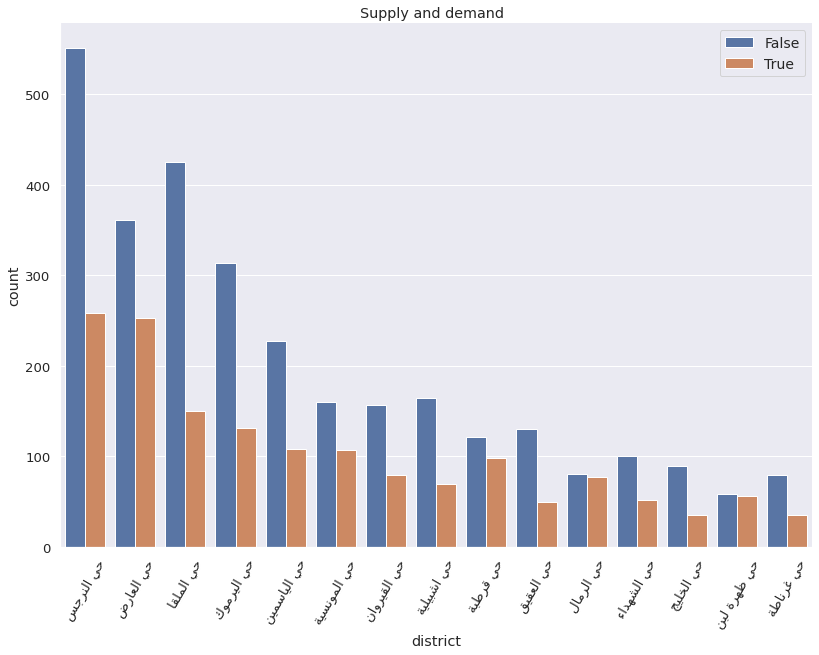

In [ ]:
ax = sns.catplot(x="district", hue="isOffMarket", kind="count", data=cp ,  order=cp.district.value_counts().iloc[:15].index , height=8.27, aspect=11.7/8.27 , legend=False )
# ax.set_xlabel("X-Axis")
ax.set_xticklabels(rotation = 60).set(title= "Supply and demand  "  )
sns.set(font_scale = 0.6)
plt.legend(loc="upper right", frameon=True , fontsize= 14  )

In [568]:
a =df.groupby('district').size()
b=  offMarket.groupby('district').size()
totalDIST = pd.concat([a,b], axis=1).rename(columns={0 : 'total'  , 1 : "offMarket"} ).reset_index()
totalDIST['percnt'] = 0
for index , row  in totalDIST.iterrows() :
    try:
        totalDIST['percnt'][index] = row['offMarket'] /  row['total']
    except:
        totalDIST['percnt'][index] = 0 

In [575]:
if totalDIST['district'][0] == 'حي أحد':
    for index, row in totalDIST.iterrows():

            totalDIST['district'][index] = modify_arabic_display(totalDIST['district'][index])

In [577]:
totalDIST1 = totalDIST[totalDIST['percnt'] > .50 ].copy()

In [578]:
totalDIST2 = (totalDIST[totalDIST['total'] > 100 ]).copy()

In [579]:
totalDIST3 = (totalDIST2.sort_values(by='percnt' , ascending=False)).copy()

## what is the most rented district ? 

Text(0.5, 1.0, 'what are the highest district that are rented')

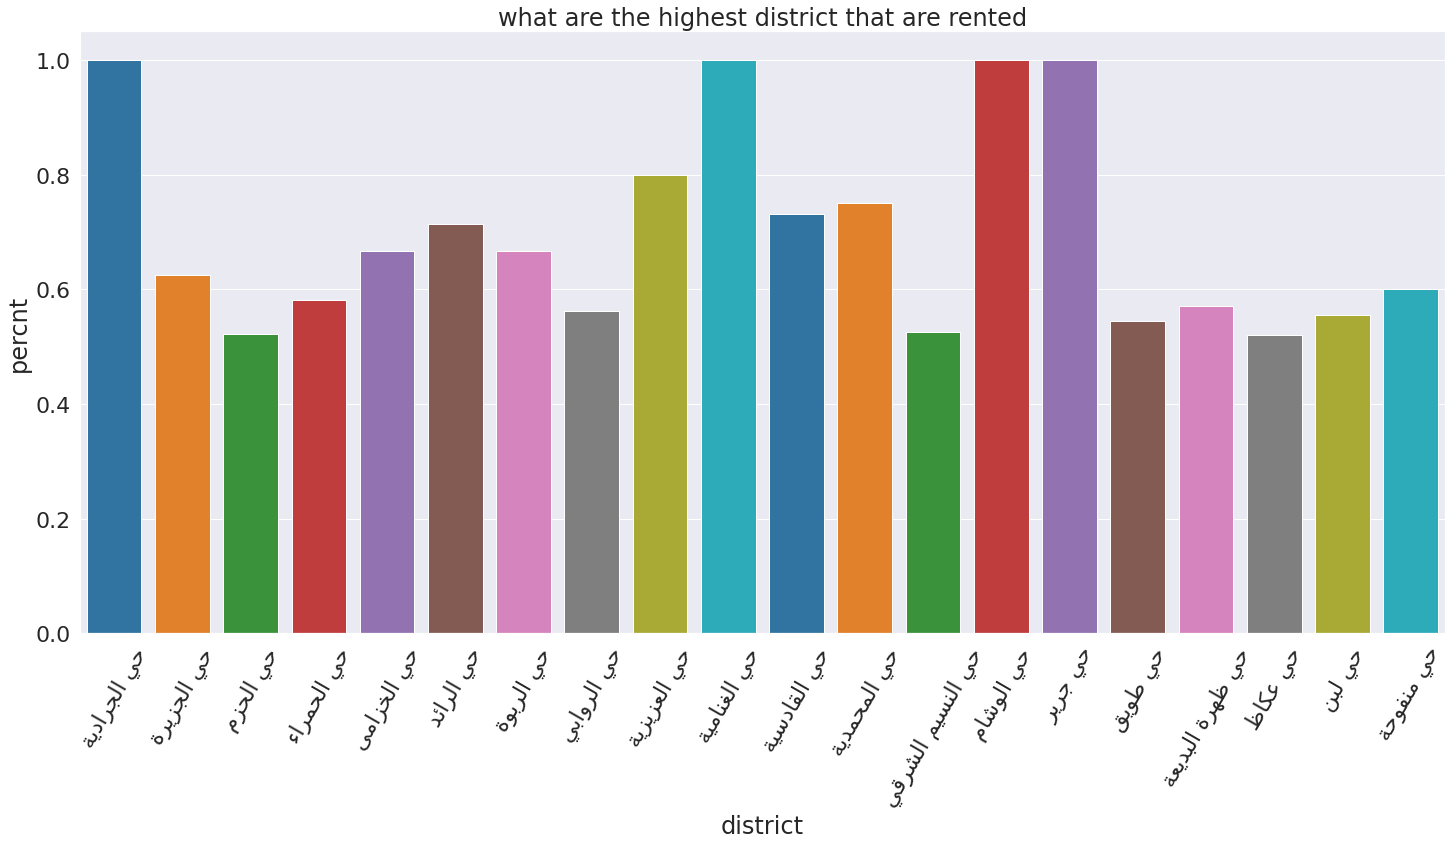

In [611]:
ax = sns.barplot(data= totalDIST1 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)
plt.title('what are the highest district that are rented')

## what is the most reented district that are rented more than 50 times ? 

Text(0.5, 1.0, 'how many apartment is rented in the high supply district')

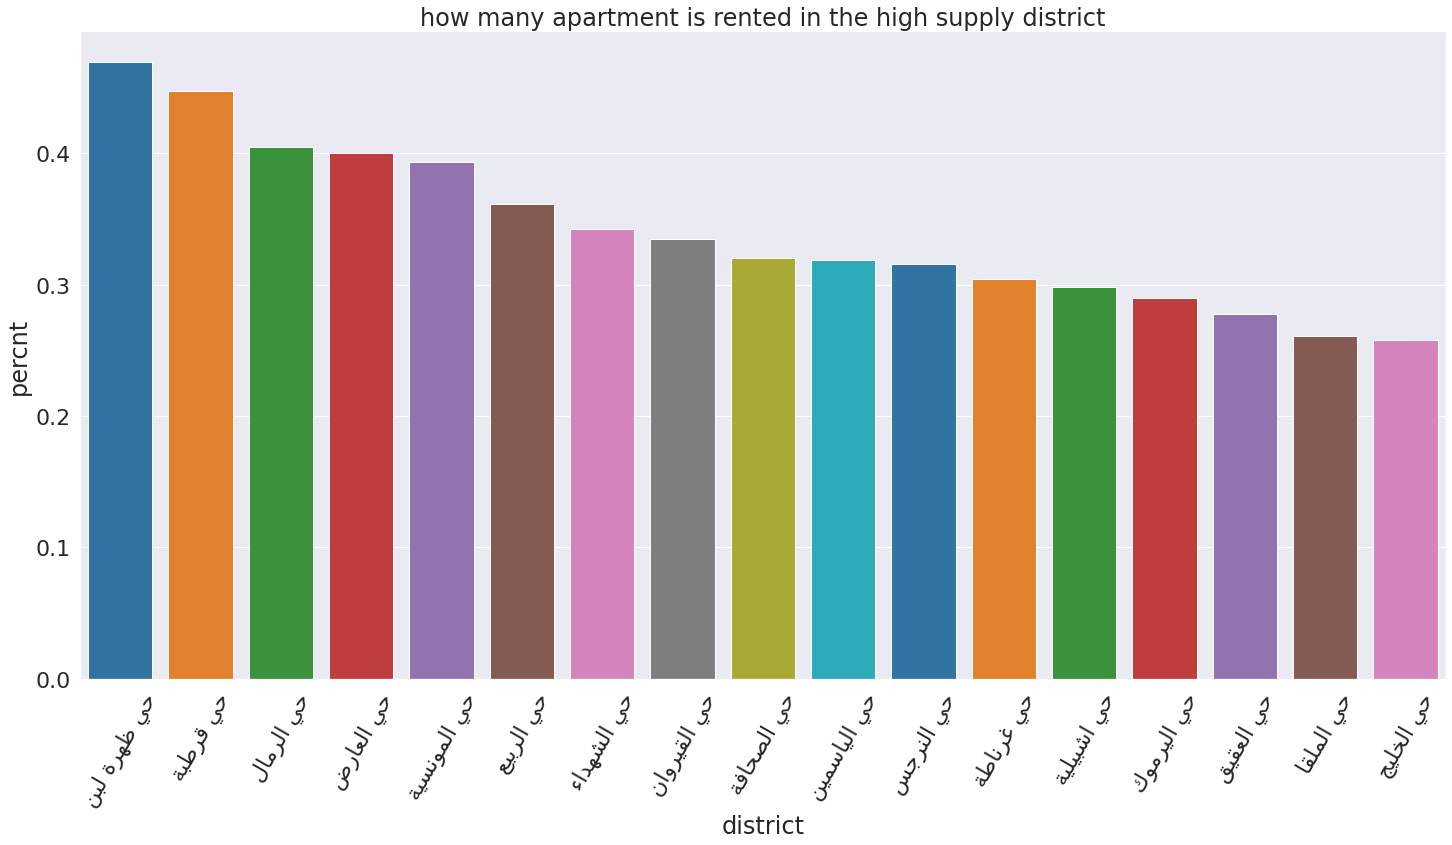

In [610]:
ax = sns.barplot(data= totalDIST3 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)
plt.title('how many apartment is rented in the high supply district')

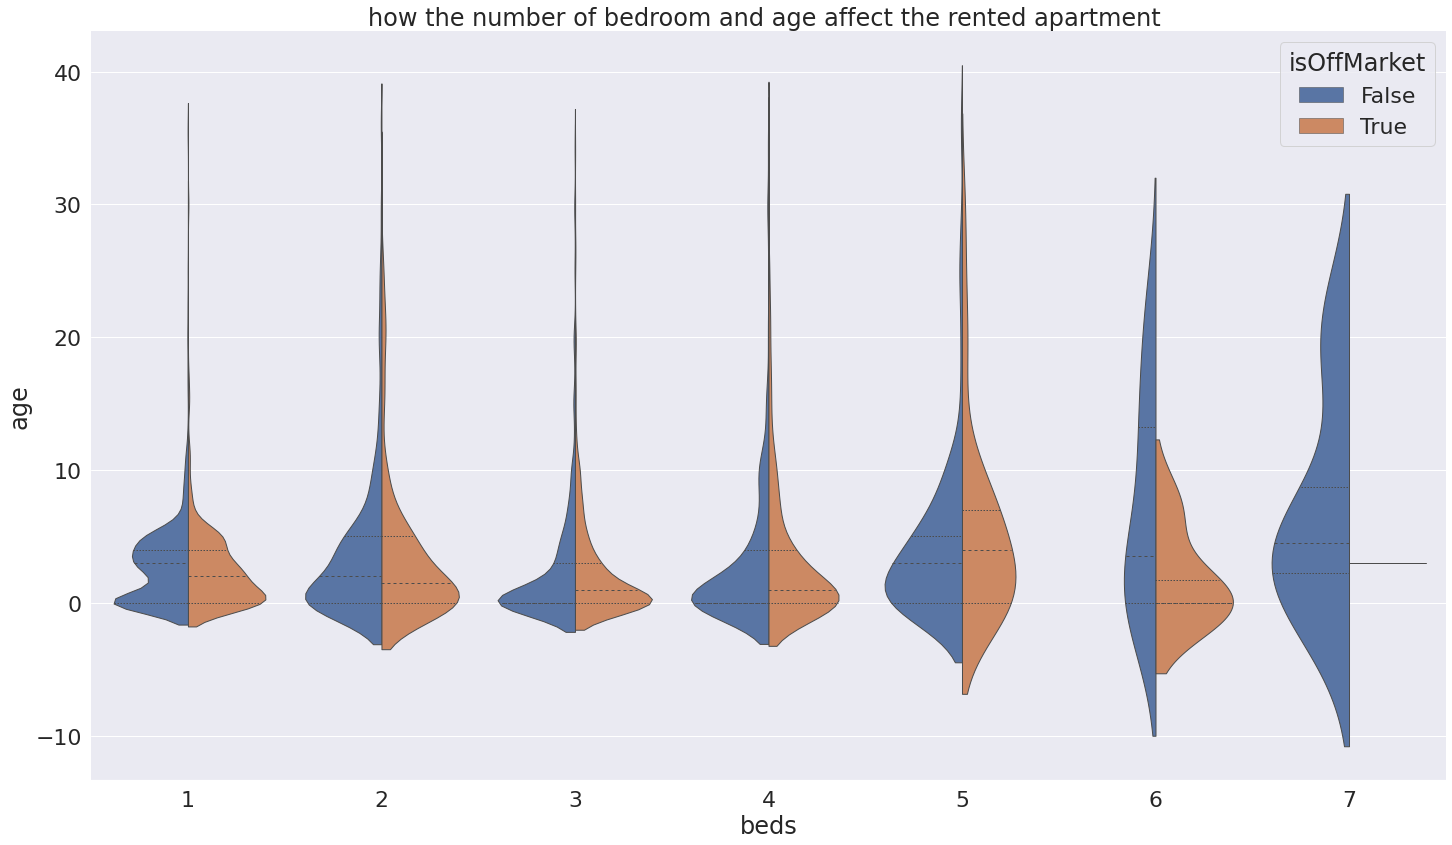

In [583]:



sns.violinplot(data=df, x="beds", y="age", hue="isOffMarket",
               split=True, inner="quart", linewidth=1
            #    palette={"Yes": "b", "No": ".85"}
            ).tiset(tle= "how the number of bedroom and age affect the rented apartment "  )
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set(font_scale = 2)
sns.despine(left=True)

## how long does the apartment stay on maket

In [609]:
fig = go.Figure(  )
fig.add_trace(go.Histogram( x=onMarket['onMarket']  , name="Unrented"))
fig.add_trace(go.Histogram( x=offMarket['onMarket'] , name="rented"))
fig.update_layout(
    title="the diffrence between the rented and unrented depending on how much  they stayed on the market ",
    xaxis_title="day on the market",
    
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
        
    ))

# Overlay both histograms
fig.update_layout(barmode='overlay' )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75 )
fig.show()